# Please check CatBOOST section for the results saved in submission file

Author: Ashutosh Tripathi

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset'

/content/drive/MyDrive/Artivatic/ML_Artivatic_dataset


In [ ]:
!ls

sample_submission.csv  test_indessa.csv  train_indessa.csv


In [ ]:
# !unzip ML_Artivatic_dataset.zip

### Imports and fetch data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import nltk
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import random
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import sklearn.utils
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [172]:
train = pd.read_csv("train_indessa.csv")
test = pd.read_csv("test_indessa.csv")

In [ ]:
train.keys()

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [ ]:
test.keys()

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

### EDA and Preprocessing

In [ ]:
categorical = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status",
                "pymnt_plan", "purpose", "delinq_2yrs", "inq_last_6mths", "pub_rec", "initial_list_status",
                "collections_12_mths_ex_med", "application_type", "verification_status_joint", "acc_now_delinq", "loan_status"]
unique_counts = {key1:len(train[key1].unique()) for key1 in train.keys()}
# unique_counts
for k in unique_counts.keys():
  if unique_counts[k]<40:
    print(k,train[k].unique())

term ['36 months' '60 months']
grade ['E' 'B' 'A' 'D' 'C' 'F' 'G']
sub_grade ['E3' 'B4' 'A4' 'D5' 'B2' 'A5' 'B1' 'C4' 'D4' 'C3' 'D2' 'A3' 'A1' 'C1'
 'D1' 'E2' 'B3' 'A2' 'C2' 'C5' 'E4' 'D3' 'B5' 'F2' 'F5' 'E1' 'E5' 'F4'
 'F1' 'F3' 'G4' 'G3' 'G5' 'G1' 'G2']
emp_length ['9 years' '< 1 year' '2 years' '10+ years' '5 years' '8 years' '7 years'
 '4 years' nan '1 year' '3 years' '6 years']
home_ownership ['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'NONE' 'ANY']
verification_status ['Source Verified' 'Not Verified' 'Verified']
pymnt_plan ['n' 'y']
purpose ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'major_purchase' 'small_business' 'vacation' 'car' 'moving' 'medical'
 'wedding' 'renewable_energy' 'house' 'educational']
delinq_2yrs [ 0.  3.  1.  4.  2.  5. 13.  6. 10.  9. 11. 14.  7.  8. 12. 18. 19. 15.
 27. 16. nan 24. 30. 21. 17. 26. 22.]
inq_last_6mths [ 1.  0.  2.  5.  3.  4.  6.  7. 11.  8.  9. 10. 12. 28. 17. 14. 24. nan
 15. 20. 16. 13. 31. 18.]
pub_rec [ 1.  0.  2.  3.  5.  4. 

In [ ]:
train.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [ ]:
train.shape

(532428, 45)

In [ ]:
test.shape

(354951, 44)

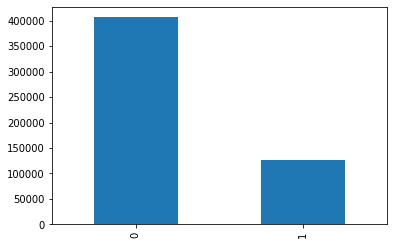

In [ ]:
train["loan_status"].value_counts().plot.bar()

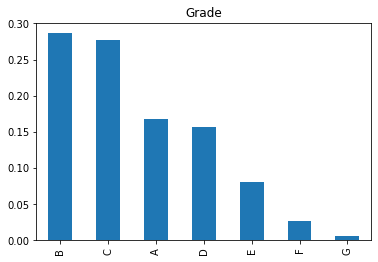

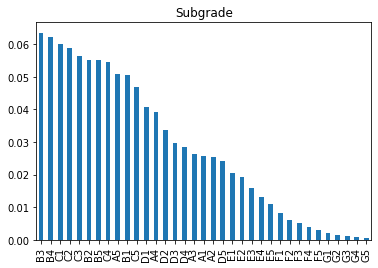

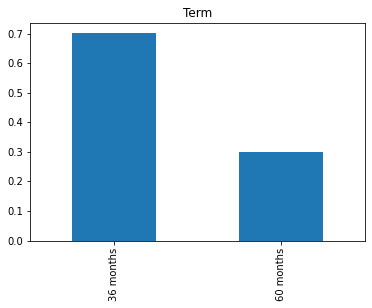

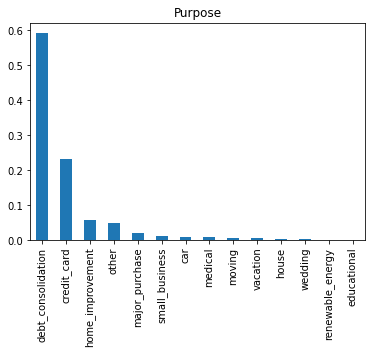

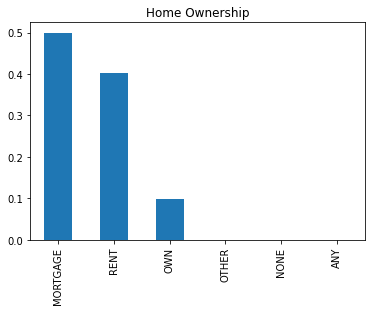

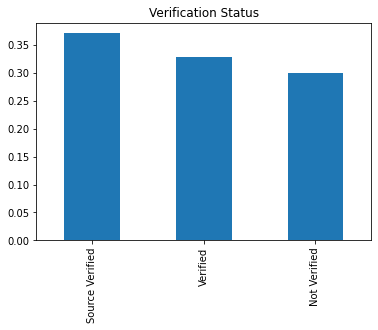

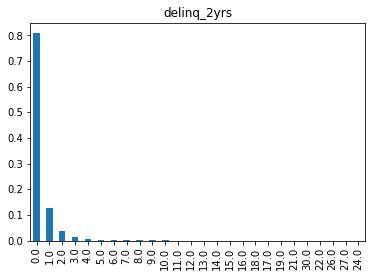

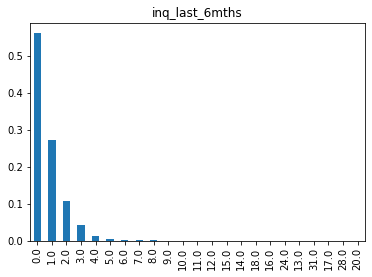

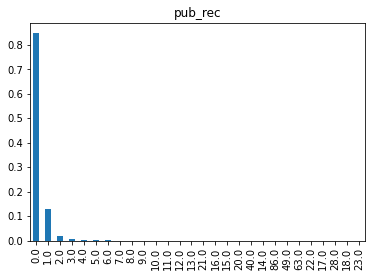

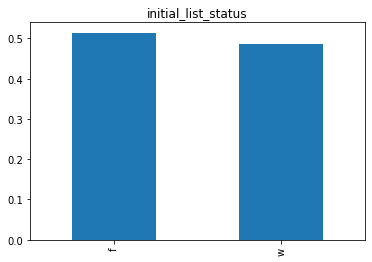

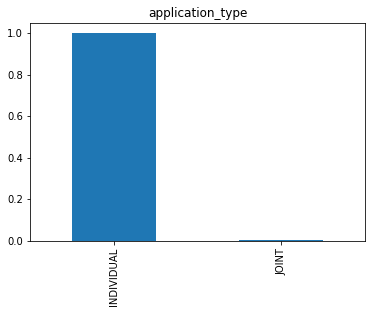

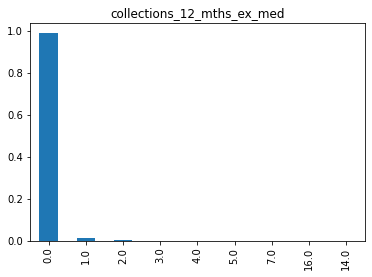

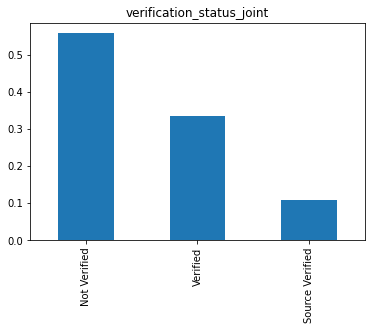

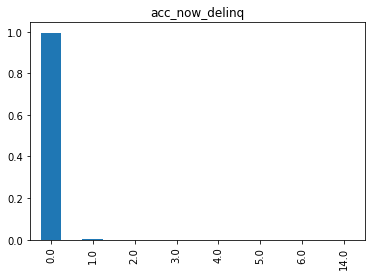

In [ ]:
plt.figure(1)
# plt.subplot(911)
train["grade"].value_counts(normalize=True).plot.bar(title="Grade")
plt.figure(2)
# plt.subplot(912)
train["sub_grade"].value_counts(normalize=True).plot.bar(title="Subgrade")
plt.figure(3)
# plt.subplot(913)
train["term"].value_counts(normalize=True).plot.bar(title="Term")
plt.figure(4)
# plt.subplot(914)
train["purpose"].value_counts(normalize=True).plot.bar(title="Purpose")
plt.figure(5)
# plt.subplot(915)
train["home_ownership"].value_counts(normalize=True).plot.bar(title="Home Ownership")
plt.figure(6)
# plt.subplot(916)
train["verification_status"].value_counts(normalize=True).plot.bar(title="Verification Status")
plt.figure(7)
# plt.subplot(917)
train["delinq_2yrs"].value_counts(normalize=True).plot.bar(title="delinq_2yrs")
plt.figure(8)
# plt.subplot(918)
train["inq_last_6mths"].value_counts(normalize=True).plot.bar(title="inq_last_6mths")
plt.figure(9)
# plt.subplot(919)
train["pub_rec"].value_counts(normalize=True).plot.bar(title="pub_rec")
plt.figure(10)
# plt.subplot(919)
train["initial_list_status"].value_counts(normalize=True).plot.bar(title="initial_list_status")
plt.figure(11)
# plt.subplot(919)
train["application_type"].value_counts(normalize=True).plot.bar(title="application_type")
plt.figure(12)
# plt.subplot(919)
train["collections_12_mths_ex_med"].value_counts(normalize=True).plot.bar(title="collections_12_mths_ex_med")
plt.figure(13)
# plt.subplot(919)
train["verification_status_joint"].value_counts(normalize=True).plot.bar(title="verification_status_joint")
plt.figure(14)
# plt.subplot(919)
train["acc_now_delinq"].value_counts(normalize=True).plot.bar(title="acc_now_delinq")


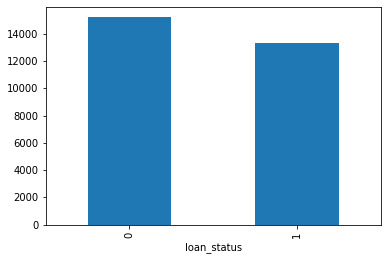

In [ ]:
train.groupby("loan_status")["loan_amnt"].mean().plot.bar()

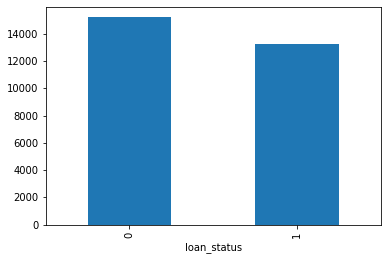

In [ ]:
train.groupby("loan_status")["funded_amnt"].mean().plot.bar()

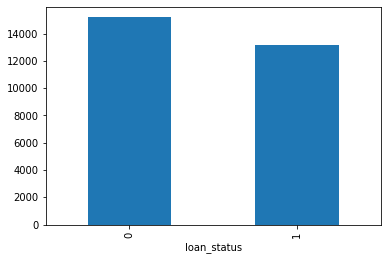

In [ ]:
train.groupby("loan_status")["funded_amnt_inv"].mean().plot.bar()

In [ ]:
# X = train.drop['batch_enrolled']

In [ ]:
train.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [178]:
train["emp_length"].fillna(train["emp_length"].mode()[0], inplace=True)
train["delinq_2yrs"].fillna(train["delinq_2yrs"].mode()[0], inplace=True)
train["inq_last_6mths"].fillna(train["inq_last_6mths"].mode()[0], inplace=True)
train["pub_rec"].fillna(train["pub_rec"].mode()[0], inplace=True)
train["collections_12_mths_ex_med"].fillna(train["collections_12_mths_ex_med"].mode()[0], inplace=True)

In [179]:
train["tot_coll_amt"].fillna(0, inplace=True)
train["tot_cur_bal"].fillna(train["tot_cur_bal"].mean(), inplace=True)
train["total_rev_hi_lim"].fillna(train["total_rev_hi_lim"].median(), inplace=True)
train["revol_util"].fillna(train["revol_util"].median(), inplace=True)
train["acc_now_delinq"].fillna(0.0, inplace=True)
train["annual_inc"].fillna(train["annual_inc"].median(), inplace=True)
train["open_acc"].fillna(train["open_acc"].median(), inplace=True)
train["total_acc"].fillna(train["total_acc"].median(), inplace=True)
train["total_acc"].fillna(train["total_acc"].median(), inplace=True)
train["mths_since_last_delinq"].fillna(0, inplace=True)

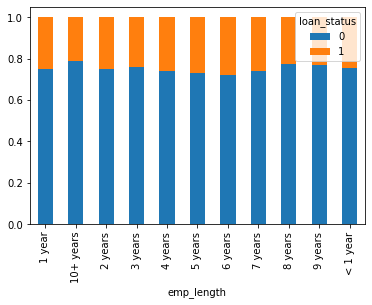

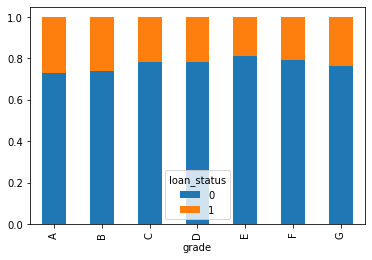

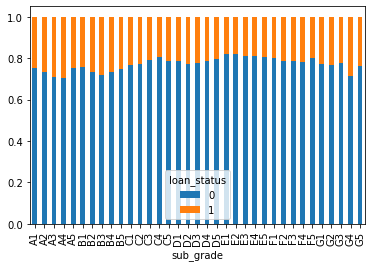

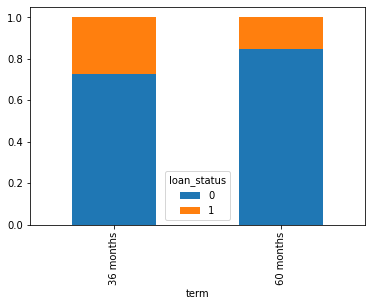

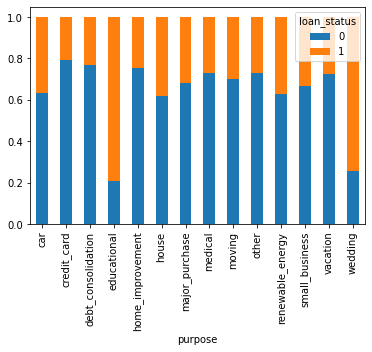

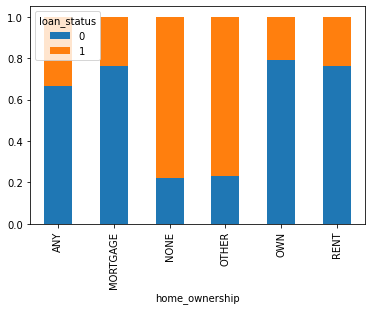

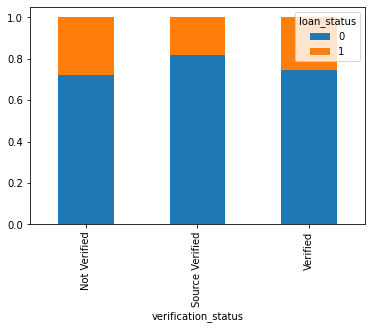

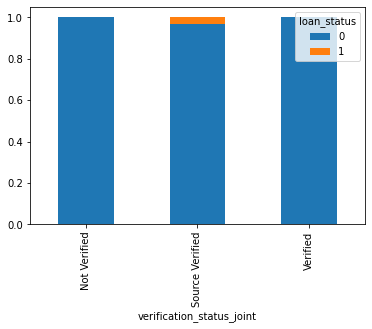

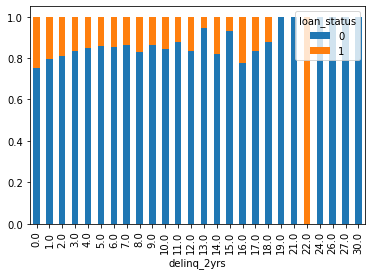

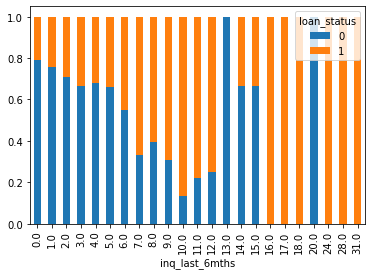

In [ ]:
emp_l = pd.crosstab(train["emp_length"], train["loan_status"])
emp_l.div(emp_l.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

grade = pd.crosstab(train["grade"], train["loan_status"])
grade.div(grade.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

sub_grade = pd.crosstab(train["sub_grade"], train["loan_status"])
sub_grade.div(sub_grade.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

term = pd.crosstab(train["term"], train["loan_status"])
term.div(term.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

purpose = pd.crosstab(train["purpose"], train["loan_status"])
purpose.div(purpose.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

home_ownership = pd.crosstab(train["home_ownership"], train["loan_status"])
home_ownership.div(home_ownership.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

verification_status = pd.crosstab(train["verification_status"], train["loan_status"])
verification_status.div(verification_status.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

verification_status_joint = pd.crosstab(train["verification_status_joint"], train["loan_status"])
verification_status_joint.div(verification_status_joint.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

delinq_2yrs = pd.crosstab(train["delinq_2yrs"], train["loan_status"])
delinq_2yrs.div(delinq_2yrs.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

inq_last_6mths = pd.crosstab(train["inq_last_6mths"], train["loan_status"])
inq_last_6mths.div(inq_last_6mths.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)


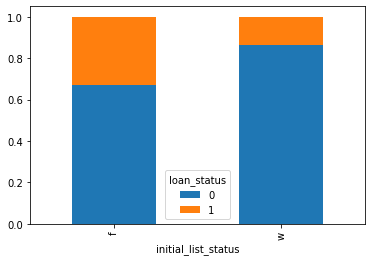

In [ ]:
lwp = pd.crosstab(train["initial_list_status"], train["loan_status"])
lwp.div(lwp.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

In [ ]:
# test[["grade", "sub_grade"]][:10]
sg = test["sub_grade"].to_list()
g = test["grade"].to_list()
sg = [s[0] for s in sg]
if g == sg:
  print("Same")

Same


In [153]:
X= []
y = []

In [180]:
X = train.drop(["member_id", "grade", "desc", "batch_enrolled", "verification_status_joint", 
                "emp_title", "mths_since_last_record", "mths_since_last_major_derog",
                "title", "loan_status"], axis=1)
#  "mths_since_last_delinq",
y = train["loan_status"]

In [ ]:
member_id = test["member_id"]

test = test.drop(["grade", "desc", "batch_enrolled", "verification_status_joint", 
                "emp_title", "mths_since_last_record", "mths_since_last_major_derog",
                "title"], axis=1)

In [183]:
test.drop(["member_id"], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14000,14000,14000.0,60 months,16.24,C5,4 years,RENT,73500.0,Source Verified,n,credit_card,450xx,OH,28.65,1.0,1.0,20.0,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,INDIVIDUAL,104th week,0.0,0.0,85230.000000,45700.0
1,16000,16000,16000.0,60 months,9.49,B2,5 years,MORTGAGE,105000.0,Source Verified,n,major_purchase,275xx,NC,31.19,0.0,0.0,0.0,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,INDIVIDUAL,57th week,0.0,0.0,444991.000000,21400.0
2,11050,11050,11050.0,60 months,15.61,D1,10+ years,RENT,62300.0,Not Verified,n,debt_consolidation,672xx,KS,21.73,1.0,0.0,23.0,11.0,1.0,12064,74.0,20.0,w,2096.21,0.0,0.0,0.0,0.0,INDIVIDUAL,70th week,0.0,0.0,105737.000000,16300.0
3,35000,35000,34700.0,60 months,12.69,C2,10+ years,OWN,150000.0,Source Verified,n,debt_consolidation,961xx,CA,17.27,0.0,0.0,0.0,21.0,0.0,32549,45.0,26.0,f,1756.31,0.0,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0.0,287022.000000,72400.0
4,6500,6500,6500.0,36 months,6.89,A3,5 years,MORTGAGE,52000.0,Not Verified,n,major_purchase,707xx,LA,20.19,0.0,0.0,0.0,16.0,0.0,5133,19.2,36.0,w,172.21,0.0,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0.0,234278.000000,26700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354946,15000,15000,15000.0,36 months,6.49,A2,1 year,MORTGAGE,97250.0,Not Verified,n,credit_card,761xx,TX,12.46,0.0,0.0,77.0,12.0,0.0,12201,27.7,24.0,w,1180.32,0.0,0.0,0.0,0.0,INDIVIDUAL,83th week,0.0,0.0,143920.000000,44000.0
354947,35000,35000,35000.0,60 months,25.89,G3,1 year,OWN,180000.0,Verified,n,debt_consolidation,115xx,NY,11.78,2.0,2.0,19.0,21.0,0.0,52584,61.4,33.0,f,6508.41,0.0,0.0,0.0,0.0,INDIVIDUAL,39th week,0.0,0.0,772713.000000,85700.0
354948,14000,14000,13975.0,60 months,17.51,E4,10+ years,OWN,56000.0,Verified,n,home_improvement,038xx,NH,16.44,0.0,3.0,54.0,11.0,1.0,10948,66.1,25.0,f,3456.24,0.0,0.0,0.0,0.0,INDIVIDUAL,87th week,0.0,0.0,139314.188087,23700.0
354949,20000,20000,20000.0,36 months,7.26,A4,< 1 year,MORTGAGE,100000.0,Source Verified,n,credit_card,206xx,MD,15.00,0.0,0.0,0.0,7.0,0.0,33599,61.5,11.0,w,766.84,0.0,0.0,0.0,0.0,INDIVIDUAL,35th week,0.0,0.0,291998.000000,54600.0


In [177]:
test["emp_length"].fillna(test["emp_length"].mode()[0], inplace=True)
test["delinq_2yrs"].fillna(test["delinq_2yrs"].mode()[0], inplace=True)
test["inq_last_6mths"].fillna(test["inq_last_6mths"].mode()[0], inplace=True)
test["pub_rec"].fillna(test["pub_rec"].mode()[0], inplace=True)
test["collections_12_mths_ex_med"].fillna(test["collections_12_mths_ex_med"].mode()[0], inplace=True)
test["mths_since_last_delinq"].fillna(0, inplace=True)

test["tot_coll_amt"].fillna(0, inplace=True)
test["tot_cur_bal"].fillna(test["tot_cur_bal"].mean(), inplace=True)
test["total_rev_hi_lim"].fillna(test["total_rev_hi_lim"].median(), inplace=True)
test["revol_util"].fillna(test["revol_util"].median(), inplace=True)
test["acc_now_delinq"].fillna(0.0, inplace=True)
test["annual_inc"].fillna(test["annual_inc"].median(), inplace=True)
test["open_acc"].fillna(test["open_acc"].median(), inplace=True)
test["total_acc"].fillna(test["total_acc"].median(), inplace=True)
test["total_acc"].fillna(test["total_acc"].median(), inplace=True)

In [ ]:
X.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
collections_12_mths_ex_med    0
application_type              0
last_week_pay                 0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

In [176]:
test.isnull().sum()

member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
pymnt_plan                         0
purpose                            0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq        181758
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
initial_list_status                0
total_rec_int                      0
total_rec_late_fee                 0
r

In [185]:
lb = LabelEncoder()
X["term"] = lb.fit_transform(train["term"])
X["mths_since_last_delinq"] = lb.fit_transform(train["mths_since_last_delinq"])
# X["mths_since_last_major_derog"] = lb.fit_transform(train["mths_since_last_major_derog"])
X["zip_code"] = lb.fit_transform(train["zip_code"])
X["sub_grade"] = lb.fit_transform(train["sub_grade"])
X["last_week_pay"] = lb.fit_transform(train["last_week_pay"])
X["emp_length"] = lb.fit_transform(train["emp_length"])
X["home_ownership"] = lb.fit_transform(train["home_ownership"])
X["verification_status"] = lb.fit_transform(train["verification_status"])
X["pymnt_plan"] = lb.fit_transform(train["pymnt_plan"])
X["purpose"] = lb.fit_transform(train["purpose"])
X["addr_state"] = lb.fit_transform(train["addr_state"])
X["application_type"] = lb.fit_transform(train["application_type"])
X["initial_list_status"] = lb.fit_transform(train["initial_list_status"])

In [184]:
test["term"] = lb.fit_transform(test["term"])
test["mths_since_last_delinq"] = lb.fit_transform(test["mths_since_last_delinq"])
# test["mths_since_last_major_derog"] = lb.fit_transform(test["mths_since_last_major_derog"])
test["zip_code"] = lb.fit_transform(test["zip_code"])
test["sub_grade"] = lb.fit_transform(test["sub_grade"])
test["last_week_pay"] = lb.fit_transform(test["last_week_pay"])
test["emp_length"] = lb.fit_transform(test["emp_length"])
test["home_ownership"] = lb.fit_transform(test["home_ownership"])
test["verification_status"] = lb.fit_transform(test["verification_status"])
test["pymnt_plan"] = lb.fit_transform(test["pymnt_plan"])
test["purpose"] = lb.fit_transform(test["purpose"])
test["addr_state"] = lb.fit_transform(test["addr_state"])
test["application_type"] = lb.fit_transform(test["application_type"])
test["initial_list_status"] = lb.fit_transform(test["initial_list_status"])

In [ ]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,0,19.19,22,9,4,28700.0,1,0,2,9,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,0,62,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,0,10.99,8,10,1,65000.0,1,0,4,20,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,0,96,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,0,7.26,3,2,4,45000.0,0,0,2,35,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,0,96,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,0,19.72,19,1,5,105000.0,0,0,2,45,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,0,13,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,0,10.64,6,1,5,52000.0,2,0,1,4,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,0,95,0.0,0.0,47159.0,47033.0


In [ ]:
train[train["last_week_pay"].notnull()]["last_week_pay"].value_counts()
# len(train)
# train[["title", "purpose"]].head(100)

13th week     30333
9th week      28626
26th week     27475
22th week     26000
4th week      25704
              ...  
304th week        1
274th week        1
300th week        1
269th week        1
278th week        1
Name: last_week_pay, Length: 98, dtype: int64

In [ ]:
train["annual_inc"].median()

65000.0

In [ ]:
train.describe()

In [ ]:
print("Total: ",len(train["loan_status"].to_list()))
print("Non Defaulters: ",train["loan_status"].to_list().count(0))
print("Defaulters: ",train["loan_status"].to_list().count(1))

Total:  532428
Non Defaulters:  406601
Defaulters:  125827


In [ ]:
train.corr()

In [ ]:
categorical

In [ ]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [ ]:
# X = pd.get_dummies(X)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,14350,14350,14350.0,36 months,19.19,E3,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,FL,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0
1,4800,4800,4800.0,36 months,10.99,B4,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,MD,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0
2,10000,10000,10000.0,36 months,7.26,A4,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,OH,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0
3,15000,15000,15000.0,36 months,19.72,D5,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,VA,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0
4,16000,16000,16000.0,36 months,10.64,B2,10+ years,RENT,52000.0,Verified,n,credit_card,CA,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0


In [ ]:
len([i for i in (X["delinq_2yrs"]).to_list() if i!=0])

102308

In [ ]:
from sklearn import preprocessing
# import pandas as pd
# housing = pd.read_csv("/content/sample_data/california_housing_train.csv")
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
X = pd.DataFrame(d, columns=names)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.401449,0.401449,0.410000,0.0,0.585974,0.647059,0.9,0.8,0.002895,0.5,0.0,0.153846,0.18,0.050378,0.0,0.032258,0.155556,0.011628,0.008764,0.081923,0.167702,0.0,0.048495,0.0,0.0,0.0,0.0,0.0,0.639175,0.0,0.000000,0.003587,0.003080
1,0.124638,0.124638,0.137143,0.0,0.239544,0.235294,1.0,0.2,0.006717,0.5,0.0,0.307692,0.40,0.005412,0.0,0.032258,0.066667,0.000000,0.002968,0.026000,0.074534,1.0,0.003468,0.0,0.0,0.0,0.0,0.0,0.989691,0.0,0.000000,0.001247,0.003290
2,0.275362,0.275362,0.285714,0.0,0.081960,0.088235,0.2,0.8,0.004611,0.0,0.0,0.153846,0.70,0.027390,0.0,0.000000,0.055556,0.000000,0.004234,0.034966,0.111801,1.0,0.002333,0.0,0.0,0.0,0.0,0.0,0.989691,0.0,0.000131,0.004787,0.003490
3,0.420290,0.420290,0.428571,0.0,0.608365,0.558824,0.1,1.0,0.010928,0.0,0.0,0.153846,0.90,0.022260,0.0,0.064516,0.111111,0.000000,0.005337,0.062199,0.124224,0.0,0.200723,0.0,0.0,0.0,0.0,0.0,0.134021,0.0,0.000000,0.006945,0.002470
4,0.449275,0.449275,0.457143,0.0,0.224757,0.176471,0.1,1.0,0.005348,1.0,0.0,0.076923,0.08,0.029977,0.0,0.000000,0.122222,0.000000,0.013949,0.085397,0.161491,1.0,0.094871,0.0,0.0,0.0,0.0,0.0,0.979381,0.0,0.000000,0.005895,0.004703


In [186]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.1)

### SMOTE
Later it was not included because of little improvement in the result.

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### CatBOOST

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import xgboost as xgb

def get_results(classifier):

  classifier.fit(X=x_train, y=y_train)
  y_pred = classifier.predict(x_cv)


  print("Accuracy:", accuracy_score(y_cv, y_pred))
  print("Precision:", precision_score(y_cv, y_pred))
  print("Recall:", recall_score(y_cv, y_pred))
  print("F1-score:", f1_score(y_cv, y_pred))
  print("ROC_AUC Score:", roc_auc_score(y_cv, y_pred))

fpr_ = []
tpr_ = []
roc_auc_ = []




text_classifiers = [CatBoostClassifier()]



In [164]:
grid_search_result

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [200]:
classifier = CatBoostClassifier(depth=10, l2_leaf_reg=5, learning_rate=0.1)
classifier.fit(x_train, y_train)

0:	learn: 0.6293405	total: 248ms	remaining: 4m 7s
1:	learn: 0.5801520	total: 515ms	remaining: 4m 17s
2:	learn: 0.5454847	total: 769ms	remaining: 4m 15s
3:	learn: 0.5190148	total: 1.02s	remaining: 4m 13s
4:	learn: 0.4976533	total: 1.26s	remaining: 4m 11s
5:	learn: 0.4808802	total: 1.51s	remaining: 4m 10s
6:	learn: 0.4683747	total: 1.77s	remaining: 4m 10s
7:	learn: 0.4565684	total: 2.01s	remaining: 4m 9s
8:	learn: 0.4483219	total: 2.29s	remaining: 4m 11s
9:	learn: 0.4412537	total: 2.56s	remaining: 4m 13s
10:	learn: 0.4350010	total: 2.82s	remaining: 4m 13s
11:	learn: 0.4282568	total: 3.07s	remaining: 4m 13s
12:	learn: 0.4230371	total: 3.32s	remaining: 4m 12s
13:	learn: 0.4184800	total: 3.6s	remaining: 4m 13s
14:	learn: 0.4157104	total: 3.85s	remaining: 4m 12s
15:	learn: 0.4131368	total: 4.12s	remaining: 4m 13s
16:	learn: 0.4094218	total: 4.38s	remaining: 4m 13s
17:	learn: 0.4043188	total: 4.63s	remaining: 4m 12s
18:	learn: 0.4011131	total: 4.88s	remaining: 4m 12s
19:	learn: 0.3964871	tota

In [201]:
  y_pred = classifier.predict(x_cv)


  print("Accuracy:", accuracy_score(y_cv, y_pred))
  print("Precision:", precision_score(y_cv, y_pred))
  print("Recall:", recall_score(y_cv, y_pred))
  print("F1-score:", f1_score(y_cv, y_pred))
  print("ROC_AUC Score:", roc_auc_score(y_cv, y_pred))

Accuracy: 0.9203463366076292
Precision: 0.8950166112956811
Recall: 0.7504775549188156
F1-score: 0.8163989783107495
ROC_AUC Score: 0.8616445396462856


In [187]:
classifier = CatBoostClassifier(depth=10, l2_leaf_reg=5, learning_rate=0.1)
classifier.fit(X, y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6322056	total: 291ms	remaining: 4m 50s
1:	learn: 0.5813662	total: 568ms	remaining: 4m 43s
2:	learn: 0.5469917	total: 850ms	remaining: 4m 42s
3:	learn: 0.5196436	total: 1.12s	remaining: 4m 39s
4:	learn: 0.4977443	total: 1.45s	remaining: 4m 47s
5:	learn: 0.4817138	total: 1.71s	remaining: 4m 43s
6:	learn: 0.4672438	total: 2.01s	remaining: 4m 44s
7:	learn: 0.4556398	total: 2.29s	remaining: 4m 44s
8:	learn: 0.4469281	total: 2.58s	remaining: 4m 44s
9:	learn: 0.4402092	total: 2.85s	remaining: 4m 41s
10:	learn: 0.4318636	total: 3.12s	remaining: 4m 40s
11:	learn: 0.4248540	total: 3.41s	remaining: 4m 40s
12:	learn: 0.4188601	total: 3.69s	remaining: 4m 39s
13:	learn: 0.4148004	total: 3.96s	remaining: 4m 39s
14:	learn: 0.4106669	total: 4.24s	remaining: 4m 38s
15:	learn: 0.4081354	total: 4.53s	remaining: 4m 38s
16:	learn: 0.4040217	total: 4.81s	remaining: 4m 38s
17:	learn: 0.4003005	total: 5.09s	remaining: 4m 37s
18:	learn: 0.3972658	total: 5.35s	remaining: 4m 36s
19:	learn: 0.3930119	t

In [189]:
pred = classifier.predict(test)

In [193]:
pred.sum()

112421

In [198]:
result = pd.DataFrame({"member_id":member_id, "loan_status": pred})
result.to_csv("submission.csv", index=False)

In [199]:
result.head()

,member_id,loan_status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0


### GaussianNB, LR etc

In [ ]:
def get_results(classifier):

  classifier.fit(X=x_train, y=y_train)
  y_pred = classifier.predict(x_cv)



  print("Accuracy:", accuracy_score(y_cv, y_pred))
  print("Precision:", precision_score(y_cv, y_pred))
  print("Recall:", recall_score(y_cv, y_pred))
  print("F1-score:", f1_score(y_cv, y_pred))
  print("ROC_AUC Score:", roc_auc_score(y_cv, y_pred))


text_classifiers = [GaussianNB()]
# , LogisticRegression(max_iter=10000)]
                    # SVC(kernel='rbf'), AdaBoostClassifier(n_estimators=100, random_state=0),
                    # RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True)]
for t in text_classifiers:
  print("**************************************************************")
  print(t)
  get_results(t)
  print("**************************************************************")


**************************************************************
GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy: 0.33379035741787655
Precision: 0.2520364609708457
Recall: 0.9201817173344603
F1-score: 0.39569313593539707
ROC_AUC Score: 0.5358982896581383
**************************************************************


In [ ]:

def get_results(classifier):

  classifier.fit(X=x_train, y=y_train)
  y_pred = classifier.predict(x_cv)


  print("Accuracy:", accuracy_score(y_cv, y_pred))
  print("Precision:", precision_score(y_cv, y_pred))
  print("Recall:", recall_score(y_cv, y_pred))
  print("F1-score:", f1_score(y_cv, y_pred))
  print("ROC_AUC Score:", roc_auc_score(y_cv, y_pred))

text_classifiers = [AdaBoostClassifier(n_estimators=50, random_state=0),
                    RandomForestClassifier(n_estimators=50, max_depth=30, oob_score=True)]
for t in text_classifiers:
  print("**************************************************************")
  print(t)
  get_results(t)
  print("**************************************************************")


**************************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)
Accuracy: 0.7570760475555472
Precision: 0.4886047131197171
Recall: 0.5328438234594965
F1-score: 0.5097662665824384
ROC_AUC Score: 0.6797912949968897
**************************************************************
**************************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_

In [ ]:
X.shape

In [ ]:
x_train.values[0]

### NN Training
Do not use for now. Explore later.

In [159]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Concatenate, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [160]:
input_shape = X.shape[1]
LEARNING_RATE = 1e-3
MODEL_DROPOUT = 0.5
NB_CLASSES = 2
LOSS_FUNCTION = 'BinaryCrossentropy'

# Build Deep Learning Model
#
""" 1. Build VIDEO TITLE Model Branch """
# # Create a Sequential Model
# model = Sequential()
# # Add Input Layer
# model.add(InputLayer(input_shape=(input_shape,), name='input'))
input = Input(shape=(input_shape,))


# """ 1st Fully Connected (Dense) Layer """
# # Add Fully Connected Layer
fully_connected_1 = Dense(units=32, activation='relu', name='fully_connected_1')(input)
# # Add Dropout Layer
dropout_layer_1 = Dropout(rate=MODEL_DROPOUT, name='dropout_layer_1')(fully_connected_1)

# # """ 2nd Fully Connected (Dense) Layer """
# # Add Fully Connected Layer
fully_connected_2 = Dense(units=16, activation='relu', name='fully_connected_2')(dropout_layer_1)
# # Add Dropout Layer
dropout_layer_2 = Dropout(rate=MODEL_DROPOUT, name='dropout_layer_2')(fully_connected_2)

# """ 3rd Fully Connected (Dense) Layer """
# Add Fully Connected Layer
fully_connected_3 = Dense(units=8, activation='relu', name='fully_connected_3')(dropout_layer_2)
# Add Dropout Layer
dropout_layer_3 = Dropout(rate=MODEL_DROPOUT, name='dropout_layer_3')(fully_connected_3)

# """ 4th Fully Connected (Dense) Layer """
# Add Fully Connected Layer
fully_connected_4 = Dense(units=8, activation='relu', name='fully_connected_4')(dropout_layer_3)
# Add Dropout Layer
dropout_layer_4 = Dropout(rate=MODEL_DROPOUT, name='dropout_layer_4')(fully_connected_4)

""" Classification Layer (Softmax) """
# Add Classification (Softmax) Layer
# classification_layer = Dense(units=NB_CLASSES, activation='softmax', name='classification_layer')(dropout_layer_1)
classification_layer = Dense(units=1, activation='softmax', name='classification_layer')(fully_connected_4)

#
# Declare Model Input
#
# model_input = list()
# model_input.append(video_title_model_branch.input)
# model_input.append(video_tags_model_branch.input)
# model_input.append(video_description_model_branch.output)
# model_input.append(video_comments_model_branch.input)

# Create the Full Model
#
full_deep_learning_model = Model(input, classification_layer)
# Set Model Optimizer
optimizer = Adam(learning_rate=LEARNING_RATE)
# Compile the Model
full_deep_learning_model.compile(loss=LOSS_FUNCTION, optimizer=optimizer, metrics=['accuracy'])
# Summarize the Model
print(full_deep_learning_model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
fully_connected_1 (Dense)    (None, 32)                1152      
_________________________________________________________________
dropout_layer_1 (Dropout)    (None, 32)                0         
_________________________________________________________________
fully_connected_2 (Dense)    (None, 16)                528       
_________________________________________________________________
dropout_layer_2 (Dropout)    (None, 16)                0         
_________________________________________________________________
fully_connected_3 (Dense)    (None, 8)                 136       
_________________________________________________________________
dropout_layer_3 (Dropout)    (None, 8)                 0     

In [161]:
full_deep_learning_model.fit(X, y, validation_split=0.1, epochs=10)

Epoch 1/10
14975/14975 [==============================] - 26s 2ms/step - loss: 74.7660 - accuracy: 0.2365 - val_loss: 0.5447 - val_accuracy: 0.2345
Epoch 2/10
14975/14975 [==============================] - 24s 2ms/step - loss: 0.5492 - accuracy: 0.2365 - val_loss: 0.5450 - val_accuracy: 0.2345
Epoch 3/10
14975/14975 [==============================] - 25s 2ms/step - loss: 0.5478 - accuracy: 0.2365 - val_loss: 0.5447 - val_accuracy: 0.2345
Epoch 4/10
14975/14975 [==============================] - 25s 2ms/step - loss: 0.5474 - accuracy: 0.2365 - val_loss: 0.5447 - val_accuracy: 0.2345
Epoch 5/10
14975/14975 [==============================] - 24s 2ms/step - loss: 0.5471 - accuracy: 0.2365 - val_loss: 0.5447 - val_accuracy: 0.2345
Epoch 6/10
14975/14975 [==============================] - 23s 2ms/step - loss: 0.5474 - accuracy: 0.2365 - val_loss: 0.5447 - val_accuracy: 0.2345
Epoch 7/10
14975/14975 [==============================] - 24s 2ms/step - loss: 0.5477 - accuracy: 0.2365 - val_loss: 